# **Análise Exploratória  - ENEM 2019**

![](https://t2.tudocdn.net/523732?w=1200)

# **Introdução**

## **O que irei fazer aqui?**

Iremos fazer uma análise exploratória deste dataset

Arquivo com Legenda de cada coluna: <a href="Legenda das Colunas.xlsx">Legenda das Colunas.xlsx</a> 

# Bibliotecas Utilizadas

As bibliotecas utilizadas foram baseadas em Python, conforme item abaixo.

## NumPy:

<p>NumPy é um pacote para a linguagem Python que suporta arrays e matrizes multidimensionais, possuindo uma larga coleção de funções matemáticas para trabalhar com estas estruturas.</p>

## SciPy:

<p>SciPy é uma biblioteca Open Source em linguagem Python que foi feita para matemáticos, cientistas e engenheiros. Também tem o nome de uma popular conferência de programação científica com Python. A sua biblioteca central é NumPy que fornece uma manipulação conveniente e rápida de um array N-dimensional.</p>

## Pandas:
<p>Pandas é uma biblioteca de software criada para a linguagem Python para manipulação e análise de dados. Em particular, oferece estruturas e operações para manipular tabelas numéricas e séries temporais.</p> 

## Sikit-learn:
<p>A scikit-learn (originalmente scikits.learn) é uma biblioteca de aprendizado de máquina de código aberto para a linguagem de programação Python. Ela inclui vários algoritmos de classificação, regressão e agrupamento incluindo máquinas de vetores de suporte, florestas aleatórias, gradient boosting, k-means e DBSCAN, e é projetada para interagir com as bibliotecas Python numéricas e científicas NumPy e SciPy.</p>

## Seaborn:

<p>Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib . Ele fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.</p>

## Matplotlib:
<p>Matplotlib é uma biblioteca abrangente para a criação de visualizações estáticas, animadas e interativas em Python.</p>

**Bibliotecas**

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Carregando os Dados

In [30]:
fonte = "MICRODADOS_ENEM_2019_SAMPLE_ESTUDO.csv" 
dados_enem2019 = pd.read_csv(fonte)
dados_enem2019.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004630,2019,1507706,São Sebastião da Boa Vista,15,PA,23,M,0,3,...,A,A,A,C,A,A,D,A,A,A
1,190001004675,2019,1508100,Tucuruí,15,PA,23,F,1,3,...,A,A,A,C,A,A,E,A,B,B
2,190001004691,2019,1500958,Aurora do Pará,15,PA,22,F,1,3,...,A,A,A,B,A,A,C,A,A,A
3,190001004746,2019,1501402,Belém,15,PA,20,F,1,1,...,A,A,A,B,A,A,D,A,A,B
4,190001004781,2019,1500206,Acará,15,PA,19,F,1,3,...,A,A,A,B,B,A,C,A,A,A


In [31]:
print('Total de Linhas: {}. Total de Colunas: {}' .format(dados_enem2019.shape[0],dados_enem2019.shape[1]))

Total de Linhas: 127380. Total de Colunas: 136


# Limpeza Inicial

## Removendo Inscrição e Ano

Iremos inicialmente remover a coluna 'NU_INSCRICAO' uma vez que a mesma serve apenas para cadastro do usuário, seu ID. Também removeremos a coluna 'NU_ANO', que serve apenas para identificar o ano de realização do ENEM. Sabemos que todos os valores são relativos ao ENEM 2019.

In [32]:
dados_enem2019=dados_enem2019.drop(columns=['NU_INSCRICAO','NU_ANO'])

dados_enem2019.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,1507706,São Sebastião da Boa Vista,15,PA,23,M,0,3,1,1501402.0,...,A,A,A,C,A,A,D,A,A,A
1,1508100,Tucuruí,15,PA,23,F,1,3,1,1502939.0,...,A,A,A,C,A,A,E,A,B,B
2,1500958,Aurora do Pará,15,PA,22,F,1,3,1,1500958.0,...,A,A,A,B,A,A,C,A,A,A
3,1501402,Belém,15,PA,20,F,1,1,1,1501402.0,...,A,A,A,B,A,A,D,A,A,B
4,1500206,Acará,15,PA,19,F,1,3,1,1500206.0,...,A,A,A,B,B,A,C,A,A,A


## Removendo outros fatores

In [33]:
dados_enem2019=dados_enem2019.drop(columns=['IN_BAIXA_VISAO', 'IN_CEGUEIRA',
                                            'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA',
                                            'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA',
                                            'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO',
                                            'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO',
                                            'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF',
                                            'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO',
                                            'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO',
                                            'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18',
                                            'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO',
                                            'IN_LIBRAS', 'IN_TEMPO_ADICIONAL', 'IN_LEITURA_LABIAL',
                                            'IN_MESA_CADEIRA_RODAS', 'IN_MESA_CADEIRA_SEPARADA',
                                            'IN_APOIO_PERNA', 'IN_GUIA_INTERPRETE', 'IN_COMPUTADOR',
                                            'IN_CADEIRA_ESPECIAL', 'IN_CADEIRA_CANHOTO',
                                            'IN_CADEIRA_ACOLCHOADA', 'IN_PROVA_DEITADO',
                                            'IN_MOBILIARIO_OBESO', 'IN_LAMINA_OVERLAY',
                                            'IN_PROTETOR_AURICULAR', 'IN_MEDIDOR_GLICOSE',
                                            'IN_MAQUINA_BRAILE', 'IN_SOROBAN', 'IN_MARCA_PASSO',
                                            'IN_SONDA', 'IN_MEDICAMENTOS', 'IN_SALA_INDIVIDUAL',
                                            'IN_SALA_ESPECIAL', 'IN_SALA_ACOMPANHANTE',
                                            'IN_MOBILIARIO_ESPECIFICO', 'IN_MATERIAL_ESPECIFICO',
                                            'IN_NOME_SOCIAL'])

dados_enem2019.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,1507706,São Sebastião da Boa Vista,15,PA,23,M,0,3,1,1501402.0,...,A,A,A,C,A,A,D,A,A,A
1,1508100,Tucuruí,15,PA,23,F,1,3,1,1502939.0,...,A,A,A,C,A,A,E,A,B,B
2,1500958,Aurora do Pará,15,PA,22,F,1,3,1,1500958.0,...,A,A,A,B,A,A,C,A,A,A
3,1501402,Belém,15,PA,20,F,1,1,1,1501402.0,...,A,A,A,B,A,A,D,A,A,B
4,1500206,Acará,15,PA,19,F,1,3,1,1500206.0,...,A,A,A,B,B,A,C,A,A,A


# Análise Inicial

## O que significam os valores NaN nas notas do candidato no dataset?

In [8]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC']
dados_enem2019[provas].isna().head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC
0,True,True,True,True
1,False,False,False,False
2,True,True,True,True
3,False,False,False,False
4,False,False,False,False


Podemos ver que há valores faltantes apenas pela aparição do True no dataset acima. Por que eles aparecem?

In [9]:
dados_faltantes_notas = dados_enem2019[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_MT', 'TP_PRESENCA_LC']]
dados_faltantes_notas.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_MT,TP_PRESENCA_LC
0,NaN,NaN,NaN,NaN,0,0,0,0
1,462.2,499.9,477.9,438.0,1,1,1,1
2,NaN,NaN,NaN,NaN,0,0,0,0
3,416.7,417.3,554.3,504.4,1,1,1,1
4,439.3,546.8,506.2,465.6,1,1,1,1


A partir da tabela acima, com o índice igual a 1, é possível relacionar com as faltas dos candidatos nos dias das provas que correspondem aos valores **NaN**.

## Analisando a Faixa Etária dos Candidatos

In [10]:
idades_enem_2019 = dados_enem2019['NU_IDADE']
idades_enem_2019.value_counts(normalize = True)

18    0.169030
17    0.167153
19    0.113291
20    0.080915
16    0.062686
        ...   
7     0.000008
8     0.000008
11    0.000008
2     0.000008
85    0.000008
Name: NU_IDADE, Length: 69, dtype: float64

A idade com maior frequência nos dados da amostra foi de candidatos com 18 anos.

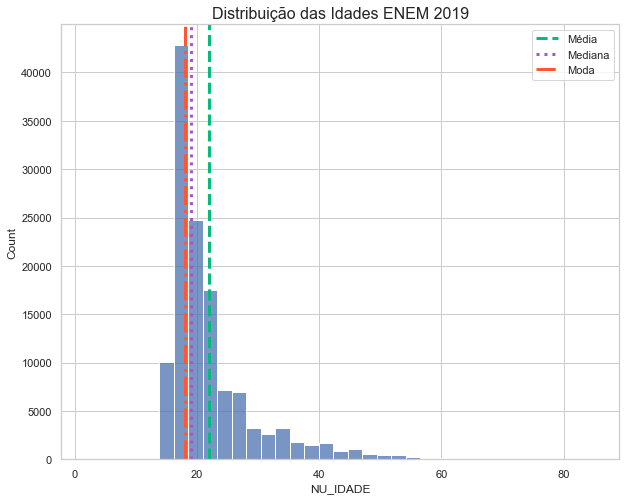

In [11]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
enem_media_idades = plt.axvline(x = idades_enem_2019.mean(), c = "#05BA7F", linewidth = 3, linestyle = '--')
enem_mediana_idades = plt.axvline(x = idades_enem_2019.median(), c = "#A558C4", linewidth = 3, linestyle = ':')
enem_moda_idades = plt.axvline(x = idades_enem_2019.mode()[0], c = "#FF5733", linewidth = 3, linestyle = '-.')
plt.legend([enem_media_idades, enem_mediana_idades, enem_moda_idades], ['Média', 'Mediana', 'Moda'])
sns.histplot(idades_enem_2019, bins = 35).set_title('Distribuição das Idades ENEM 2019', fontsize = 16);

A partir do grafico acima, é visível que a concentração de dados está por volta dos candidatos entre 17 e 25 anos. O mesmo gráfico se assemelha a uma Distribuição de Poisson.

In [12]:
idades_enem_2019.describe()

count    127380.000000
mean         22.067051
std           7.433180
min           2.000000
25%          18.000000
50%          19.000000
75%          24.000000
max          85.000000
Name: NU_IDADE, dtype: float64

A média de idade, na amostra, é de aproximadamente 22 anos. Entretanto, a mediana é de 19 anos. É possível visualizar que, apesar da idade máxima ser 85 anos, o terceiro quartil está em 24 anos de idade, sendo assim, ao menos 75% dos candidados tinham 24 anos ou menos.

Conclui-se, também, que as idades **NÃO** estão normalmente distribuídas.

### **Encontrando a média de idade por município**

In [13]:
media_idade_municipio = pd.DataFrame(dados_enem2019.groupby(['NO_MUNICIPIO_RESIDENCIA']).mean()['NU_IDADE'])
media_idade_municipio.loc[media_idade_municipio['NU_IDADE'] == media_idade_municipio['NU_IDADE'].max()] # Município com a média mais alta

,NU_IDADE
NO_MUNICIPIO_RESIDENCIA,
Maria Helena,55.0


In [14]:
media_idade_municipio.loc[media_idade_municipio['NU_IDADE'] == media_idade_municipio['NU_IDADE'].min()] # Município com a média mais baixa

,NU_IDADE
NO_MUNICIPIO_RESIDENCIA,
Abreulândia,15.0
Diamante do Sul,15.0
Fagundes Varela,15.0
Flor do Sertão,15.0
Gouvelândia,15.0
Itaipava do Grajaú,15.0
Jaborá,15.0
Lajeado Grande,15.0
Mansidão,15.0


In [15]:
municipio_idade = media_idade_municipio.index
media_idade_municipio['Cidade'] = municipio_idade
media_idade_municipio.head()

,NU_IDADE,Cidade
NO_MUNICIPIO_RESIDENCIA,,
Abadia de Goiás,21.200000,Abadia de Goiás
Abadia dos Dourados,17.000000,Abadia dos Dourados
Abadiânia,17.600000,Abadiânia
Abaetetuba,23.023669,Abaetetuba
Abaeté,21.136364,Abaeté


**Dataset que analisa a longitude e latidude de cada município a fim de gerar um gráfico cartográfico**

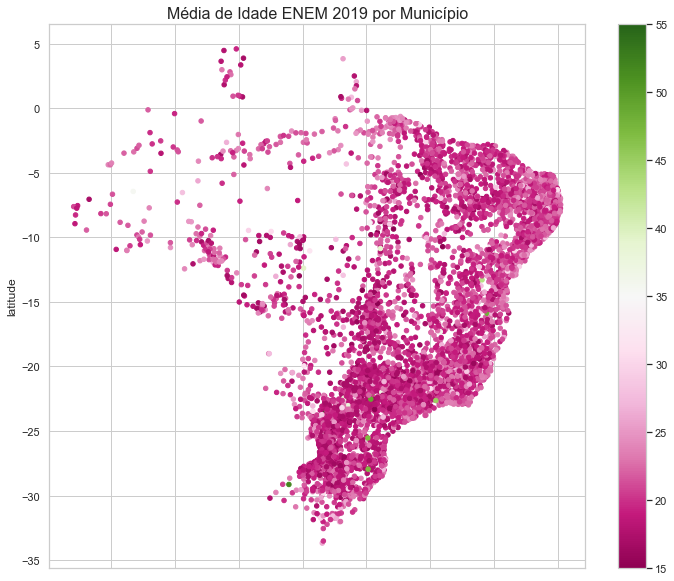

In [16]:
site = 'https://github.com/kelvins/Municipios-Brasileiros/blob/main/csv/municipios.csv?raw=true'

coordenadas = pd.read_csv(site)

concatenado_idade = pd.merge(media_idade_municipio, coordenadas, how = 'left', left_on=['Cidade'], right_on = ['nome'])

concatenado_idade.plot.scatter(y='latitude', x = 'longitude', 
                         c = concatenado_idade['NU_IDADE'],
                         cmap = 'PiYG',
                         figsize = (12,10)).set_title('Média de Idade ENEM 2019 por Município',  fontsize = 16);

No gráfico acima, a região mais escura (de acordo com a escala) tende à região Sul/Sudeste. Em contrapartida, o Nordeste apresenta levemente com uma cor mais clara. Isso ressalta que, as regiões mais ao Sul do País apresentam idades mais novas em candidatos no ENEM 2019.

**Levantamos a hipótese de uma possível política de incentivo maior às crianças e aos secundaristas.**

**Qual estado predomina com candidatos mais novos?**

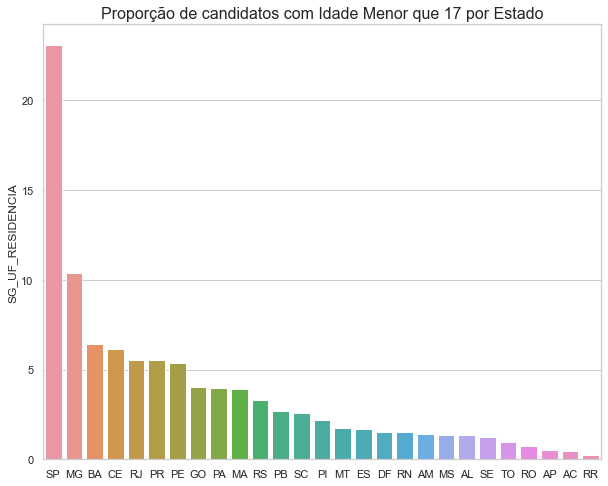

In [17]:
novos_idade_enem2019 = dados_enem2019.query('NU_IDADE <= 17')

prop_novos_idade_enem2019 = pd.DataFrame(novos_idade_enem2019['SG_UF_RESIDENCIA'].value_counts(normalize = True)*100)

plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=prop_novos_idade_enem2019.index, y = prop_novos_idade_enem2019['SG_UF_RESIDENCIA'], data=prop_novos_idade_enem2019).set_title('Proporção de candidatos com Idade Menor que 17 por Estado',  fontsize = 16)

O Estado com candidatos mais jovens foi o de São Paulo. Em sequência, segue o estado de Minas Gerais. Esse atributo pode reforçar o mapa anterior proposto, demonstrando o escurecimento na região Sudeste e Sul.

# **O comportamento das notas no Estado do Ceará de acordo com o IDH**

Importaremos os dados referente ao estado do Ceará para cada município a fim de coletar algumas informações. Os dados foram obtidos do próprio site do IBGE.

*Referência: https://www.ibge.gov.br/cidades-e-estados/ce.html*

**Importando os dados**

In [18]:
dados_ce = pd.read_excel('CE_dados.xlsx')
ce_dados = dados_enem2019.loc[dados_enem2019['SG_UF_RESIDENCIA'] == 'CE'][['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'SG_UF_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA']].dropna(subset=['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_CH'])

dados_ce.head()

,Município,Código,Gentílico,Prefeito [2017],Área Territorial - km² [2019],População estimada - pessoas [2020],Densidade demográfica - hab/km² [2010],Escolarização <span>6 a 14 anos</span> - % [2010],IDHM,Mortalidade infantil - óbitos por mil nascidos vivos [2017],Receitas realizadas - R$ (×1000) [2017],Despesas empenhadas - R$ (×1000) [2017],PIB per capita - R$ [2017]
0,Abaiara,2300101.0,abaiarense,AFONSO TAVARES LEITE,180.833,11853.0,58.69,96.7,0.628,33.33,29043.96353,26827.90366,8009.04
1,Acarape,2300150.0,acarapense,FRANKLIN VERISSIMO OLIVEIRA,130.002,15036.0,98.52,96.8,0.606,14.56,38762.53540,36800.46805,9069.38
2,Acaraú,2300200.0,acarauense,ALEXANDRE FERREIRA GOMES DA SILVEIRA,842.471,63104.0,68.31,96.8,0.601,8.81,132656.38793,116962.81301,10192.64
3,Acopiara,2300309.0,acopiarense,ANTONIO ALMEIDA NETO,2254.279,54481.0,22.58,97.2,0.595,19.54,153148.70946,125356.16693,7405.32
4,Aiuaba,2300408.0,aiuabense,RAMILSON ARAUJO MORAES,2438.563,17493.0,6.66,97.5,0.569,10.87,37794.63071,33776.93227,6087.34


In [19]:
nota_media_ce = ce_dados.groupby(['NO_MUNICIPIO_RESIDENCIA']).mean()[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC']]
nota_media_ce['Municipio'] = nota_media_ce.index
nota_media_ce.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,Municipio
NO_MUNICIPIO_RESIDENCIA,,,,,
Abaiara,429.937500,469.000000,490.337500,478.537500,Abaiara
Acarape,437.394737,462.157895,496.789474,475.042105,Acarape
Acaraú,449.180000,446.620000,501.684000,492.792000,Acaraú
Acopiara,443.053333,481.693333,467.543333,499.253333,Acopiara
Aiuaba,420.233333,442.266667,457.250000,465.983333,Aiuaba


**Plotando os Gráficos de Dispersão**

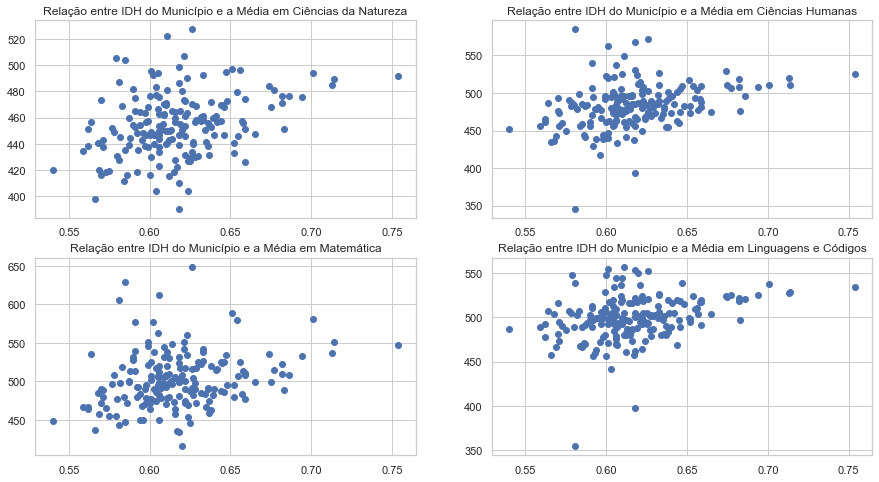

In [20]:
concatenado_ce = pd.merge(nota_media_ce, dados_ce, how = 'left', left_on=['Municipio'], right_on = ['Município'])
idh_medias_ce = concatenado_ce[['Municipio', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'IDHM']]

plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('Relação entre IDH do Município e a Média em Ciências da Natureza')
plt.scatter(data =idh_medias_ce, y ='NU_NOTA_CN', x ='IDHM');
plt.subplot(2,2,2)
plt.title('Relação entre IDH do Município e a Média em Ciências Humanas')
plt.scatter(data =idh_medias_ce, y ='NU_NOTA_CH', x ='IDHM');
plt.subplot(2,2,3)
plt.title('Relação entre IDH do Município e a Média em Matemática')
plt.scatter(data =idh_medias_ce, y ='NU_NOTA_MT', x ='IDHM');
plt.subplot(2,2,4)
plt.title('Relação entre IDH do Município e a Média em Linguagens e Códigos')
plt.scatter(data =idh_medias_ce, y ='NU_NOTA_LC', x ='IDHM');

Visualmente os dados se dispersam muito em relação ao IDH do município.

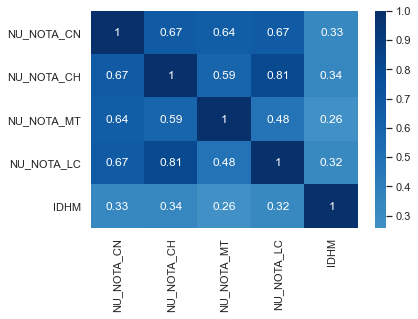

In [21]:
correlacao_ce = idh_medias_ce[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'IDHM']].corr()
sns.heatmap(correlacao_ce, cmap="Blues", center=0, annot=True);

De fato, há uma fraca relação entre o IDH e as provas. As que mais se destacaram pela relação foram Ciências Humanas e Ciências da Natureza.  Apesar de haver uma correlação fraca (não se é esperada uma correlação forte, dito que é apenas um evento de muitos) o IDH tem sim sua influência nas notas do ENEM.

Esse fator é visível a partir dos gráficos, onde há uma mínima inclinação positiva da esquerda para direita, em que **quanto maior o IDH maior serão as notas**. 

O critério de análise seguiu a Correlação de Pearson:
![](https://i0.wp.com/www.abgconsultoria.com.br/blog/wp-content/uploads/img2-2.png?w=1500)

# Teste Sincronizado GitHub

In [1]:
print('Teste')

Teste
